In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train = pd.read_csv(r'C:\Users\RAVI\Downloads\pythondocs\titanic_train.csv')
print (train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


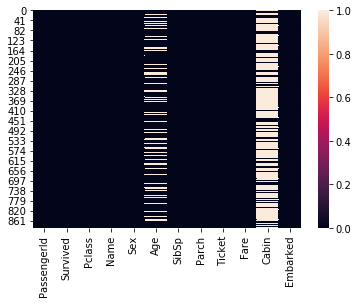

In [4]:
sns.heatmap(train.isnull())
plt.show()

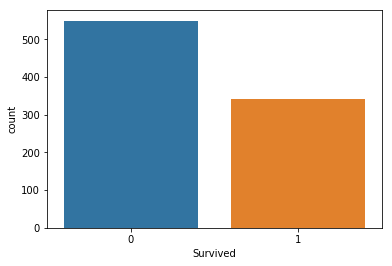

In [5]:
sns.countplot(x='Survived',data=train)
plt.show()

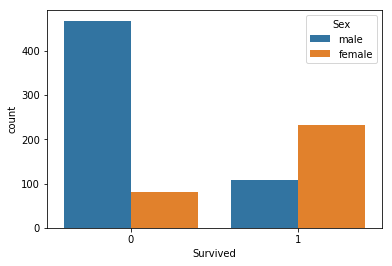

In [6]:
sns.countplot(x='Survived',hue='Sex',data=train)
plt.show()

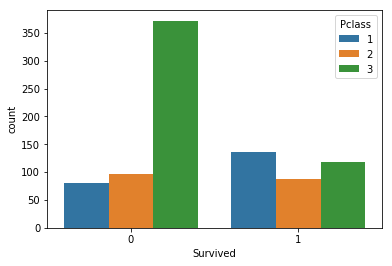

In [7]:
sns.countplot(x='Survived',hue='Pclass',data=train)
plt.show()

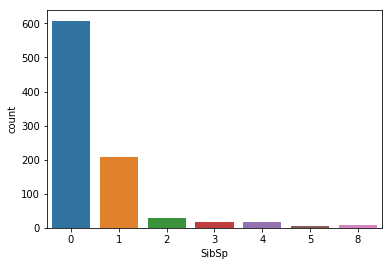

In [8]:
sns.countplot(x='SibSp',data=train)
plt.show()

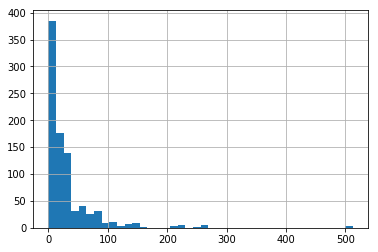

In [9]:
train['Fare'].hist(bins=40)
plt.show()

c:\users\john\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


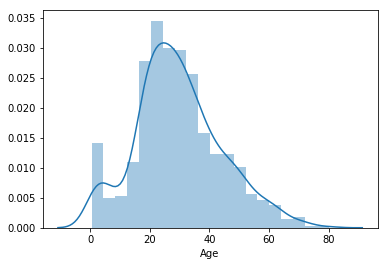

In [10]:
sns.distplot(train['Age'].dropna())
plt.show()

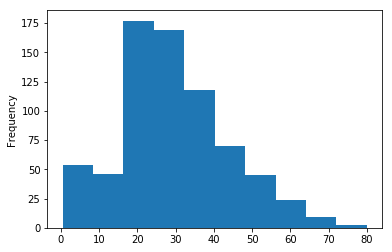

In [11]:
train['Age'].plot.hist()
plt.show()

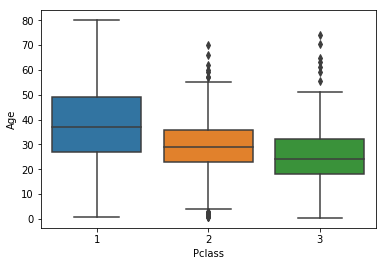

In [12]:
sns.boxplot(x='Pclass',y='Age',data=train)
plt.show()

In [13]:
def update_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [14]:
train['Age'] = train[['Age','Pclass']].apply(update_age,axis=1)

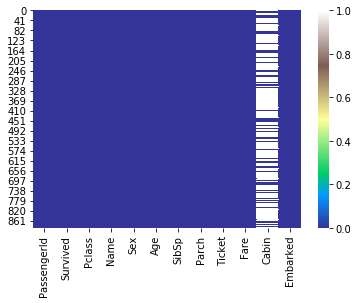

In [15]:
sns.heatmap(train.isnull(), cmap='terrain')
plt.show()

In [16]:
train.drop('Cabin',axis=1,inplace=True)

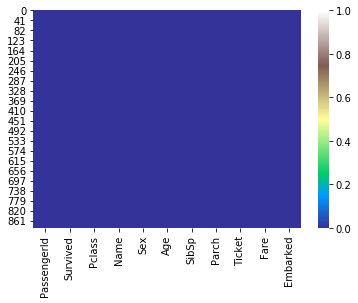

In [17]:
sns.heatmap(train.isnull(), cmap='terrain')
plt.show()

In [18]:
train.dropna(inplace=True)

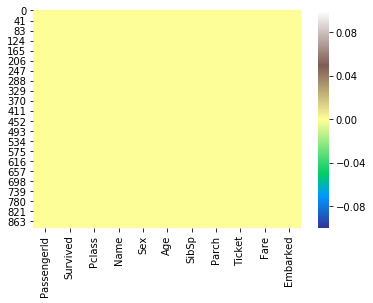

In [19]:
sns.heatmap(train.isnull(), cmap='terrain')
plt.show()

In [20]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [21]:
print (sex.head())

   male
0     1
1     0
2     0
3     0
4     1


In [22]:
print (embark.head())

   Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1


In [23]:
train = pd.concat([train,sex,embark],axis=1)
print (train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  male  Q  S  
0      0         A/5 21171   7.2500        S     1  0  1  
1      0          PC 17599  71.2833        C     0  0  0  
2      0  STON/O2. 3101282   7.9250        S     0  0  1  
3      0            113803  53.1000        S     0  0  1  
4      0            37345

In [24]:
train.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)
print (train.head())

   Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         0       3  22.0      1      0   7.2500     1  0  1
1         1       1  38.0      1      0  71.2833     0  0  0
2         1       3  26.0      0      0   7.9250     0  0  1
3         1       1  35.0      1      0  53.1000     0  0  1
4         0       3  35.0      0      0   8.0500     1  0  1


In [25]:
#------------ Applying Logistic Regression ---------------

X = train.drop('Survived',axis = 1)
y = train['Survived']

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [27]:
lg.fit(X_train,y_train)

predictions = lg.predict(X_test)

c:\users\john\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions,labels=[0,1])
print (cm)

[[148  15]
 [ 36  68]]


In [29]:
print (pd.crosstab(y_test,predictions,rownames=['Actual Values'],colnames=['Predicted Values']))


Predicted Values    0   1
Actual Values            
0                 148  15
1                  36  68


In [38]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
print("Accuracy:",accuracy_score(y_test, predictions))

Accuracy: 0.8089887640449438


In [34]:
print (f1_score(y_test,predictions))

0.7272727272727274


In [39]:
print (precision_score(y_test,predictions))

0.8192771084337349


In [40]:
print (recall_score(y_test,predictions))

0.6538461538461539
